In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Easy

In [13]:
def load_and_describe(file_name):
    data=pd.read_csv(file_name)
    return data
df=load_and_describe('Electric_Vehicle_Population_Data.csv')    

In [10]:
print(df.columns) #For my info

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


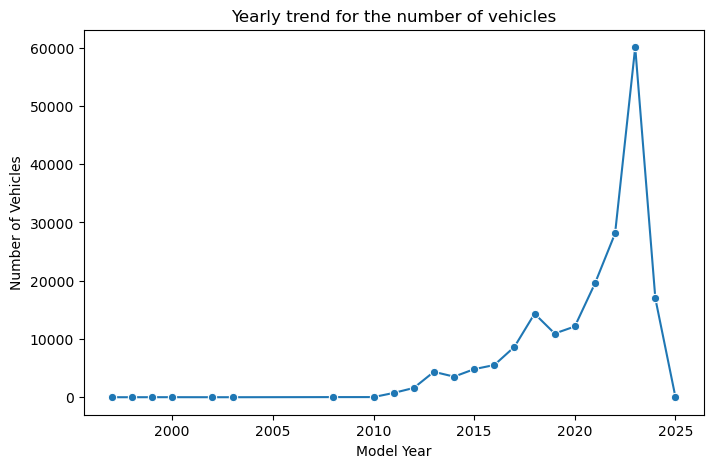

In [19]:
#Yearly_vehical_count

yearly_vehical_count =df["Model Year"].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.lineplot(x= yearly_vehical_count.index, y=yearly_vehical_count.values, marker="o")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.title("Yearly trend for the number of vehicles")
plt.show()

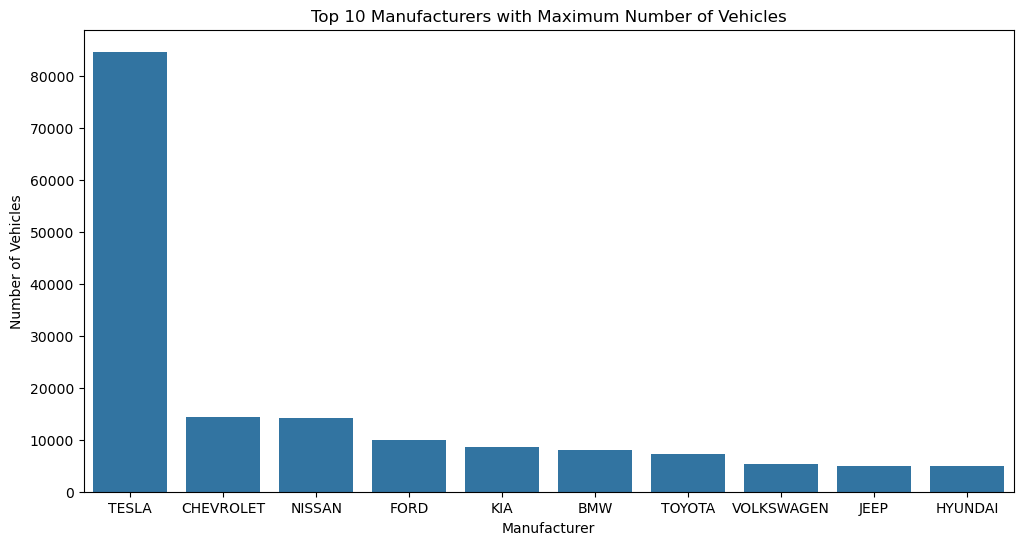

In [12]:
# Top 10 manufacturers with the maximum number of vehicles
top_makes = df["Make"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Manufacturers with Maximum Number of Vehicles")
plt.show()

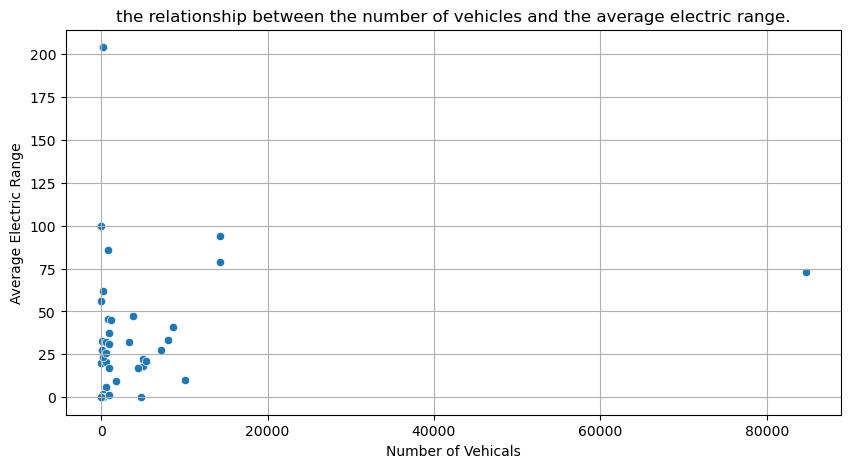

In [16]:
#relationship between the number of vehicles and the average electric range
vehical_count= df["Make"].value_counts()
avg_range= df.groupby("Make")["Electric Range"].mean()
plt.figure(figsize=(10,5))

sns.scatterplot(x=vehical_count, y=avg_range)

plt.xlabel("Number of Vehicals")
plt.ylabel("Average Electric Range")
plt.title("the relationship between the number of vehicles and the average electric range.")
plt.grid(True)
plt.show()

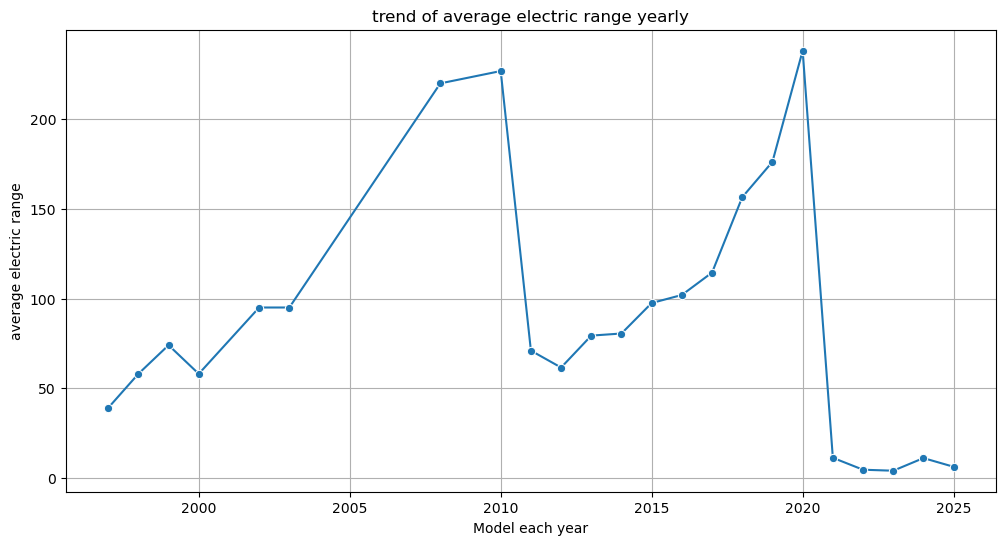

In [28]:
#Trend of average electric range yearly
avg_yearly_range=df.groupby("Model Year")["Electric Range"].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_yearly_range.index, y=avg_yearly_range.values, marker="o")
plt.xlabel("Model each year")
plt.ylabel("average electric range")
plt.title("trend of average electric range yearly")
plt.grid(True)
plt.show()

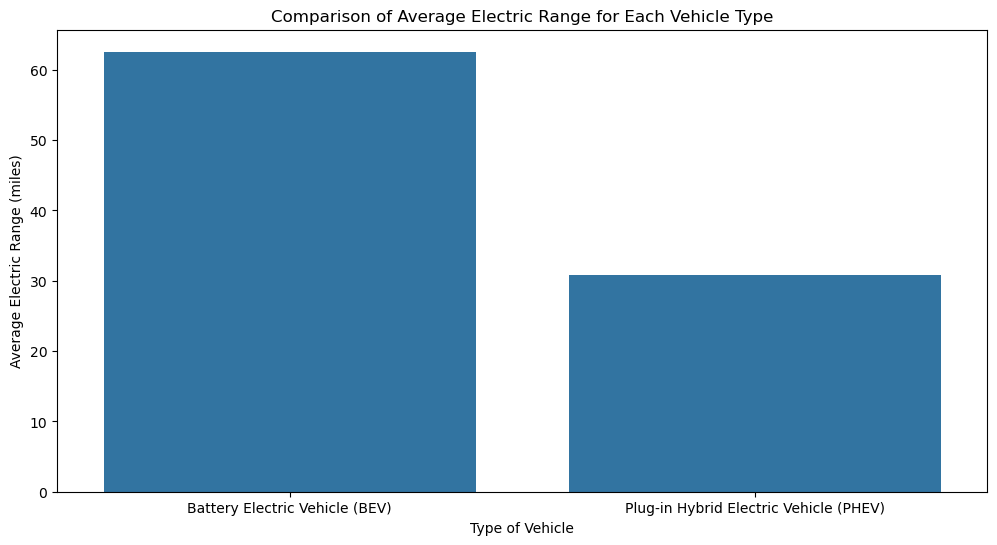

In [91]:
#Compare the average electric range for every vehicle type.
avg_range_by_type = df.groupby("Electric Vehicle Type")["Electric Range"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="Electric Vehicle Type", y="Electric Range", data=avg_range_by_type)

plt.xlabel("Type of Vehicle")
plt.ylabel("Average Electric Range (miles)")
plt.title("Comparison of Average Electric Range for Each Vehicle Type")
plt.show()

# Medium Case

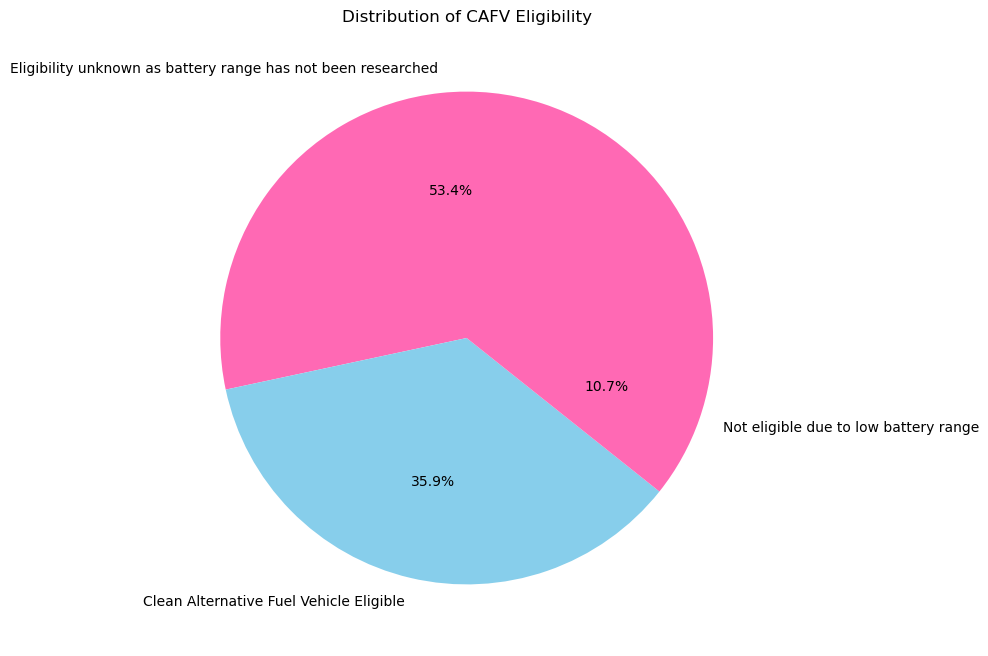

In [76]:
# percentage of vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV)
cafv_counts = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', colors=["#FF69B4", "#87CEEB"], startangle=140)
plt.title("Distribution of CAFV Eligibility")
plt.show()

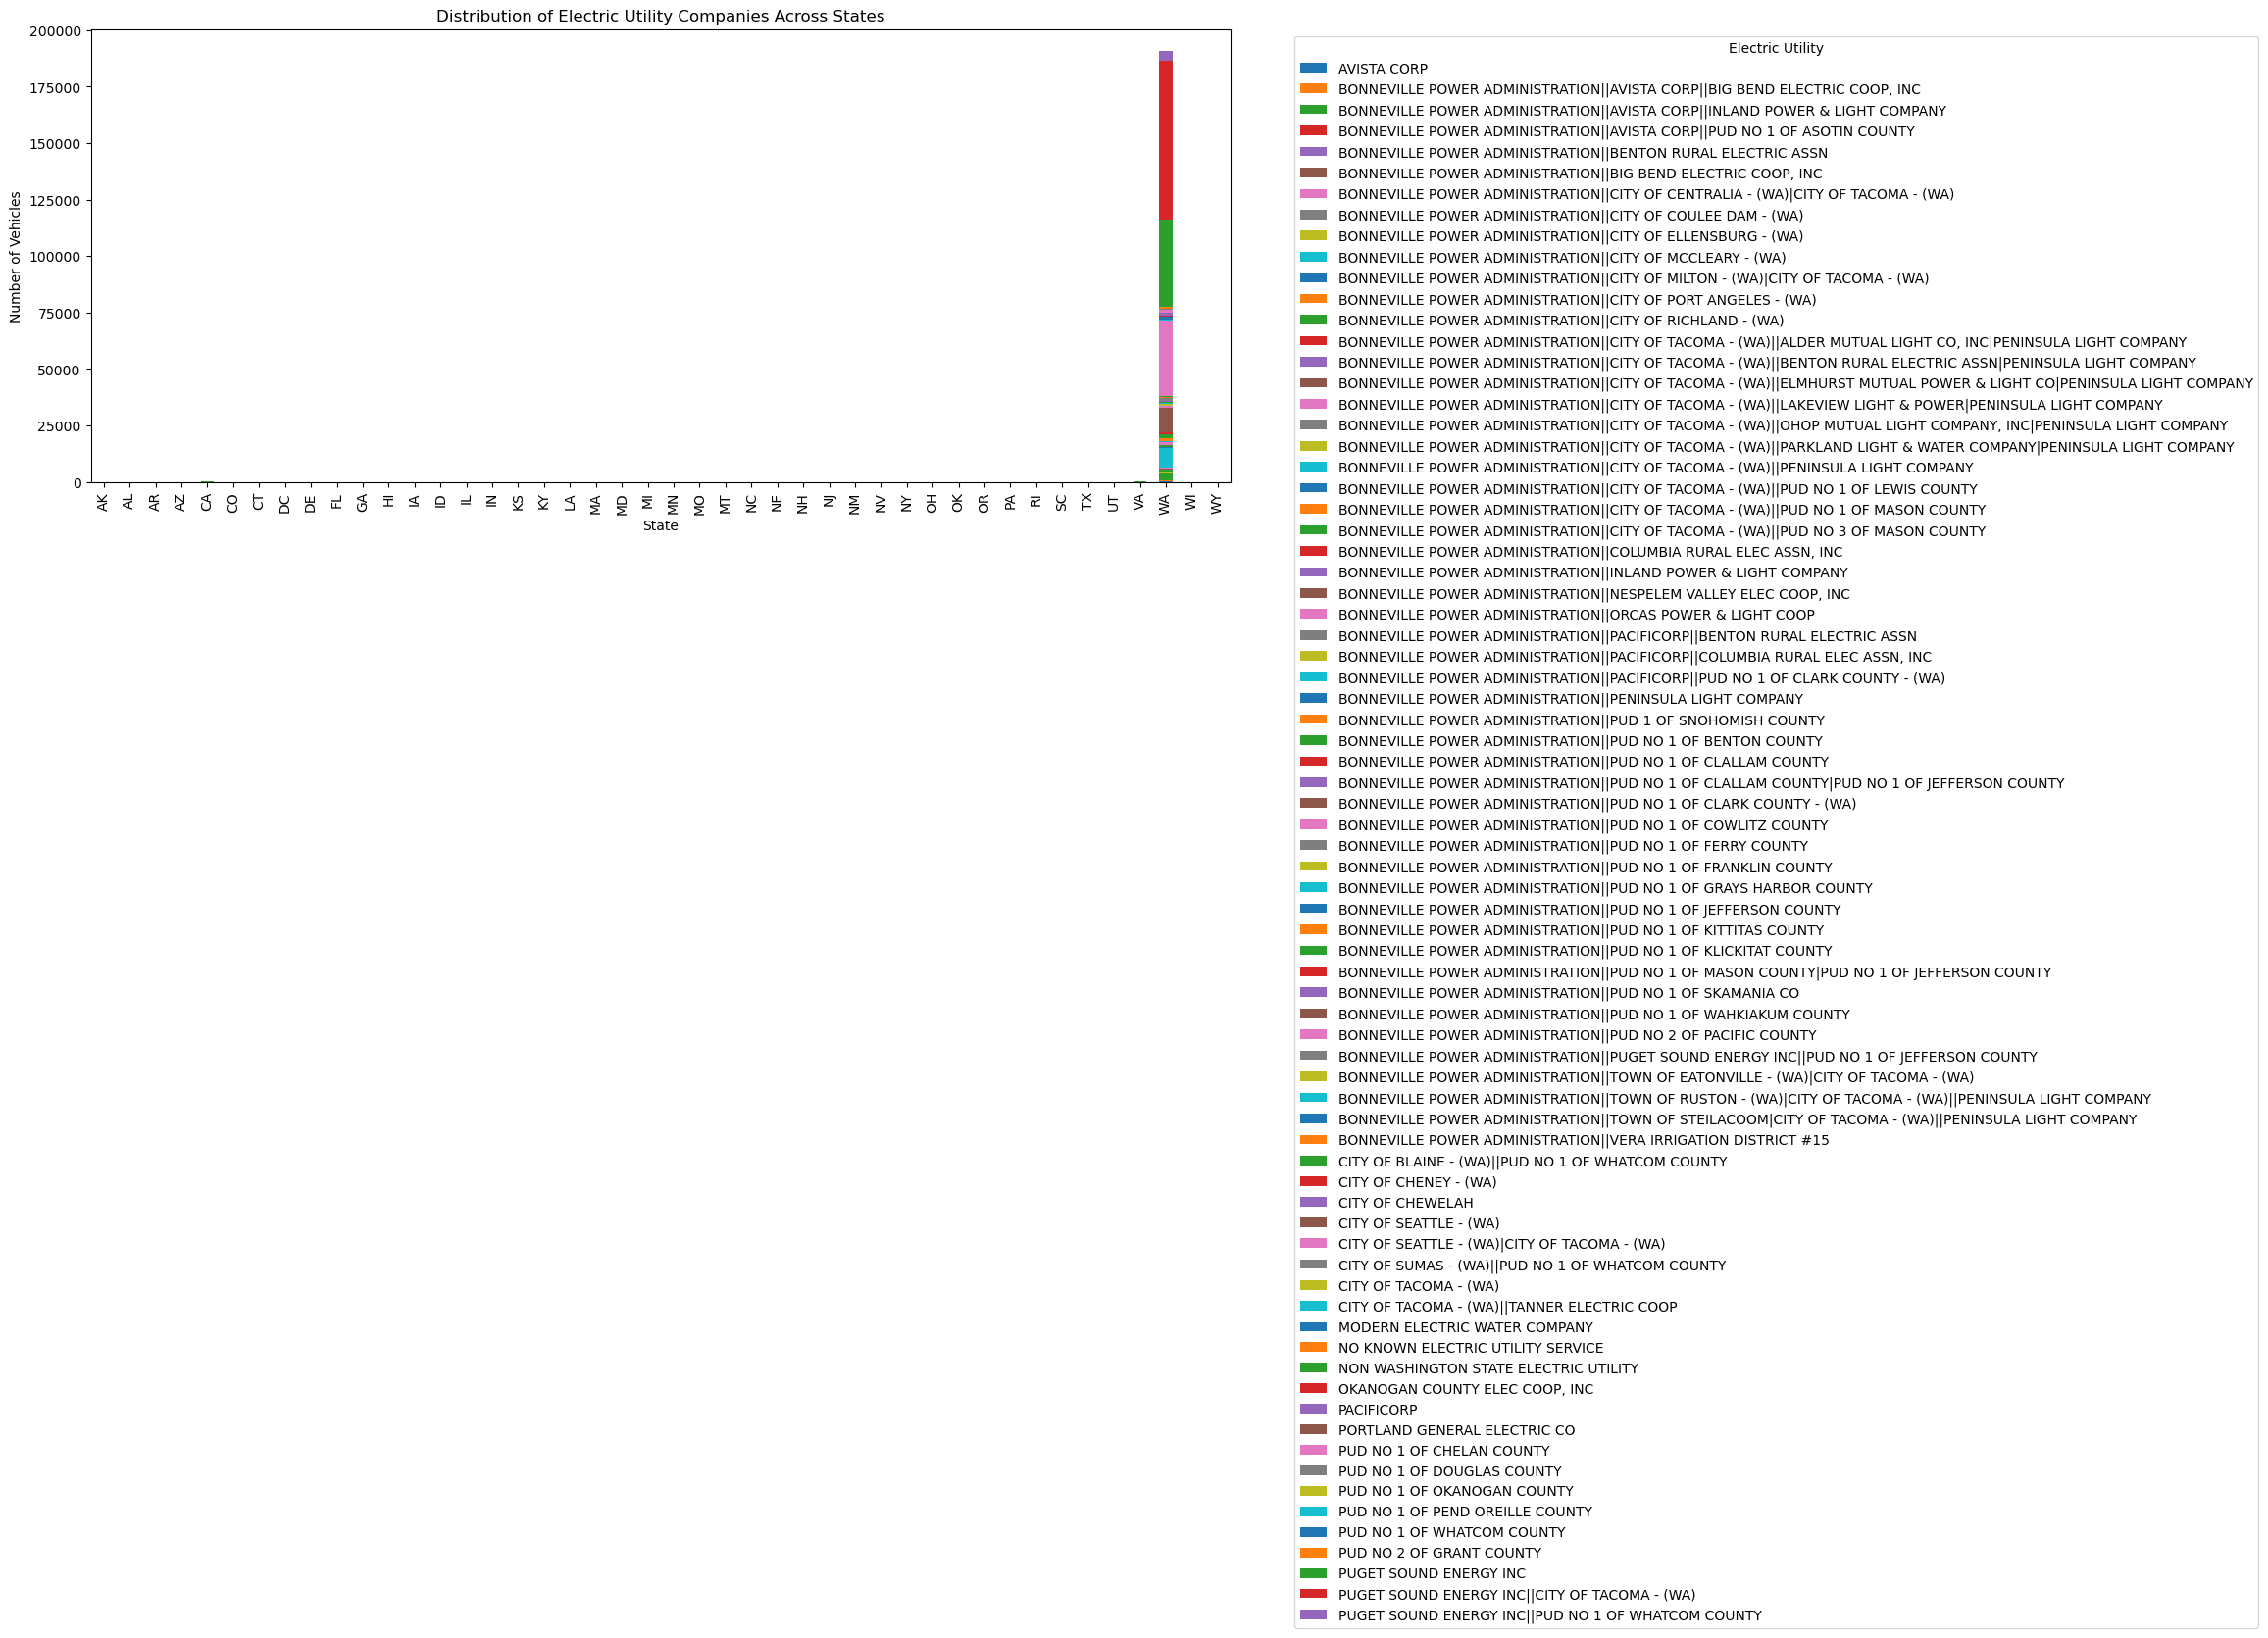

In [109]:
#distribution of electric utility companies vary across states
df.groupby("State")["Electric Utility"].value_counts().unstack().plot(kind="bar", figsize=(15, 6), stacked=True)
plt.bar(county_counts.index, county_counts.values)

plt.xlabel("State")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Electric Utility Companies Across States")
plt.legend(title="Electric Utility", bbox_to_anchor=(1.05, 1))

plt.show()


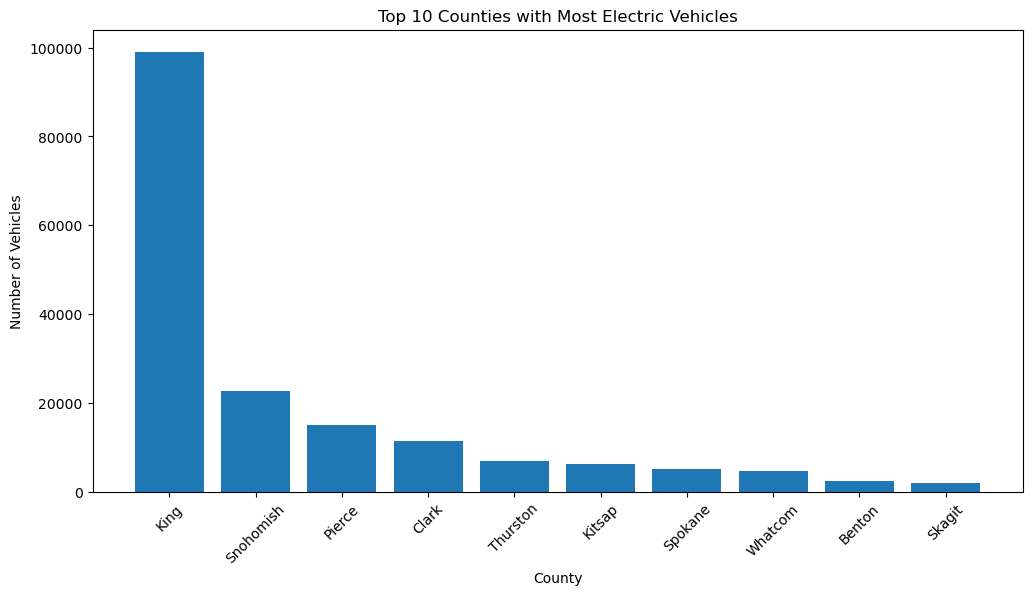

In [101]:
#geographical distribution of electric vehicles by county
county_counts = df["County"].value_counts().head(10)  # Top 10 counties
plt.figure(figsize=(12, 6))
plt.bar(county_counts.index, county_counts.values)

plt.xlabel("County")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Counties with Most Electric Vehicles")
plt.xticks(rotation=45)
plt.show()


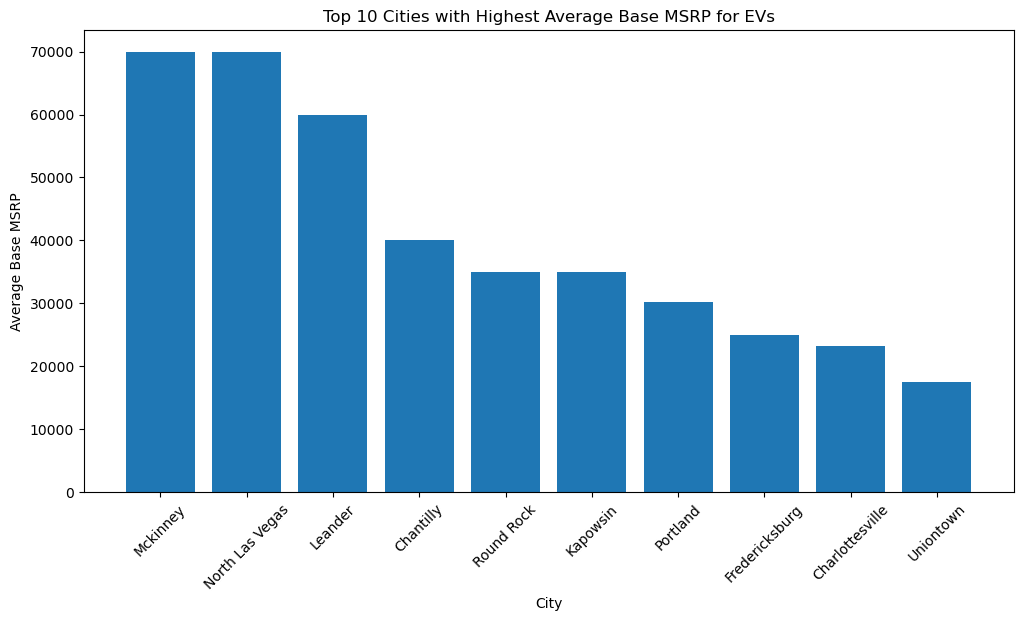

In [105]:
avg_msrp_by_city = df.groupby("City")["Base MSRP"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(avg_msrp_by_city.index, avg_msrp_by_city.values)

plt.xlabel("City")
plt.ylabel("Average Base MSRP")
plt.title("Top 10 Cities with Highest Average Base MSRP for EVs")
plt.show()


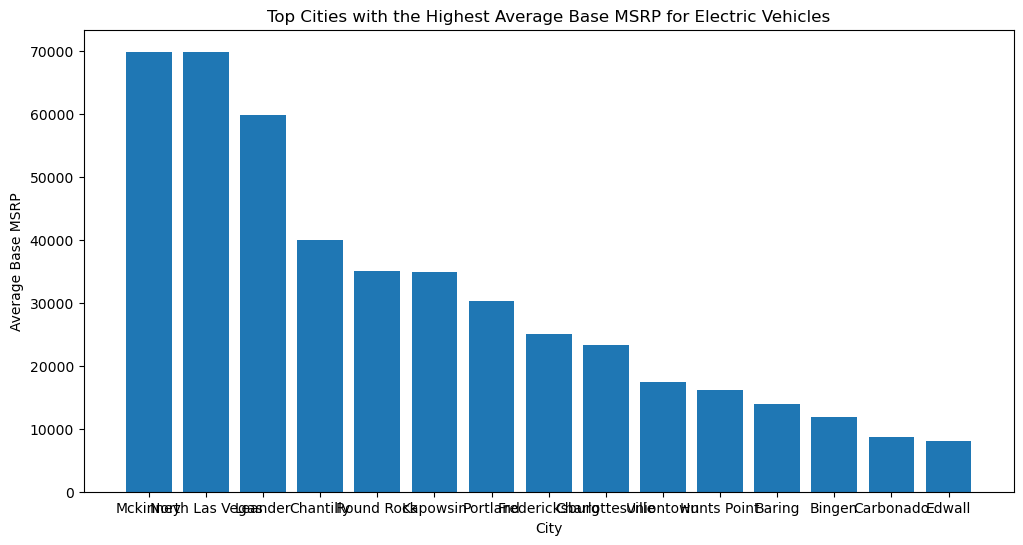

In [115]:
#Correlation between the base MSRP and electric range?
city_msrp = df.groupby("City")["Base MSRP"].mean().sort_values(ascending=False).head(15)  # Top 15 cities
plt.figure(figsize=(12, 6))
plt.bar(city_msrp.index, city_msrp.values)
plt.xlabel("City")
plt.ylabel("Average Base MSRP")
plt.title("Top Cities with the Highest Average Base MSRP for Electric Vehicles")
plt.show()


# Hard Case

<Figure size 1200x600 with 0 Axes>

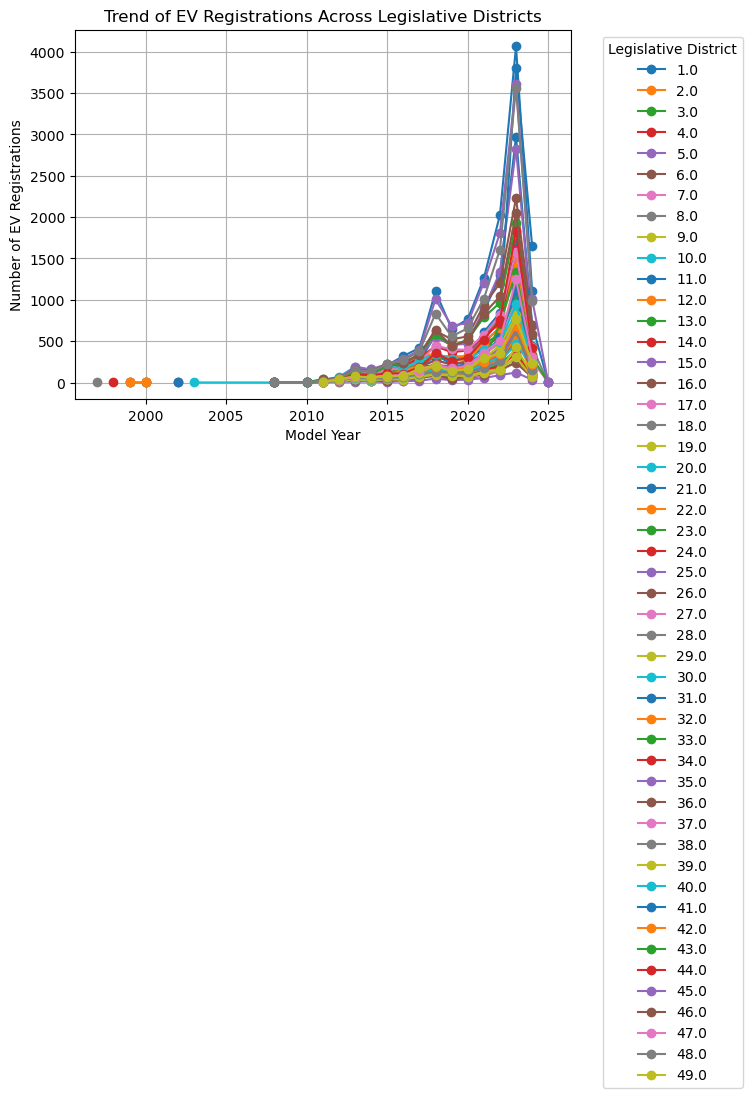

In [140]:
# trend of electric vehicle registrations across different legislative districts
df_grouped = df.groupby(["Model Year", "Legislative District"])["VIN (1-10)"].count().unstack()

plt.figure(figsize=(12, 6))
df_grouped.plot(kind="line", marker="o")

plt.xlabel("Model Year")
plt.ylabel("Number of EV Registrations")
plt.title("Trend of EV Registrations Across Legislative Districts")
plt.legend(title="Legislative District", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


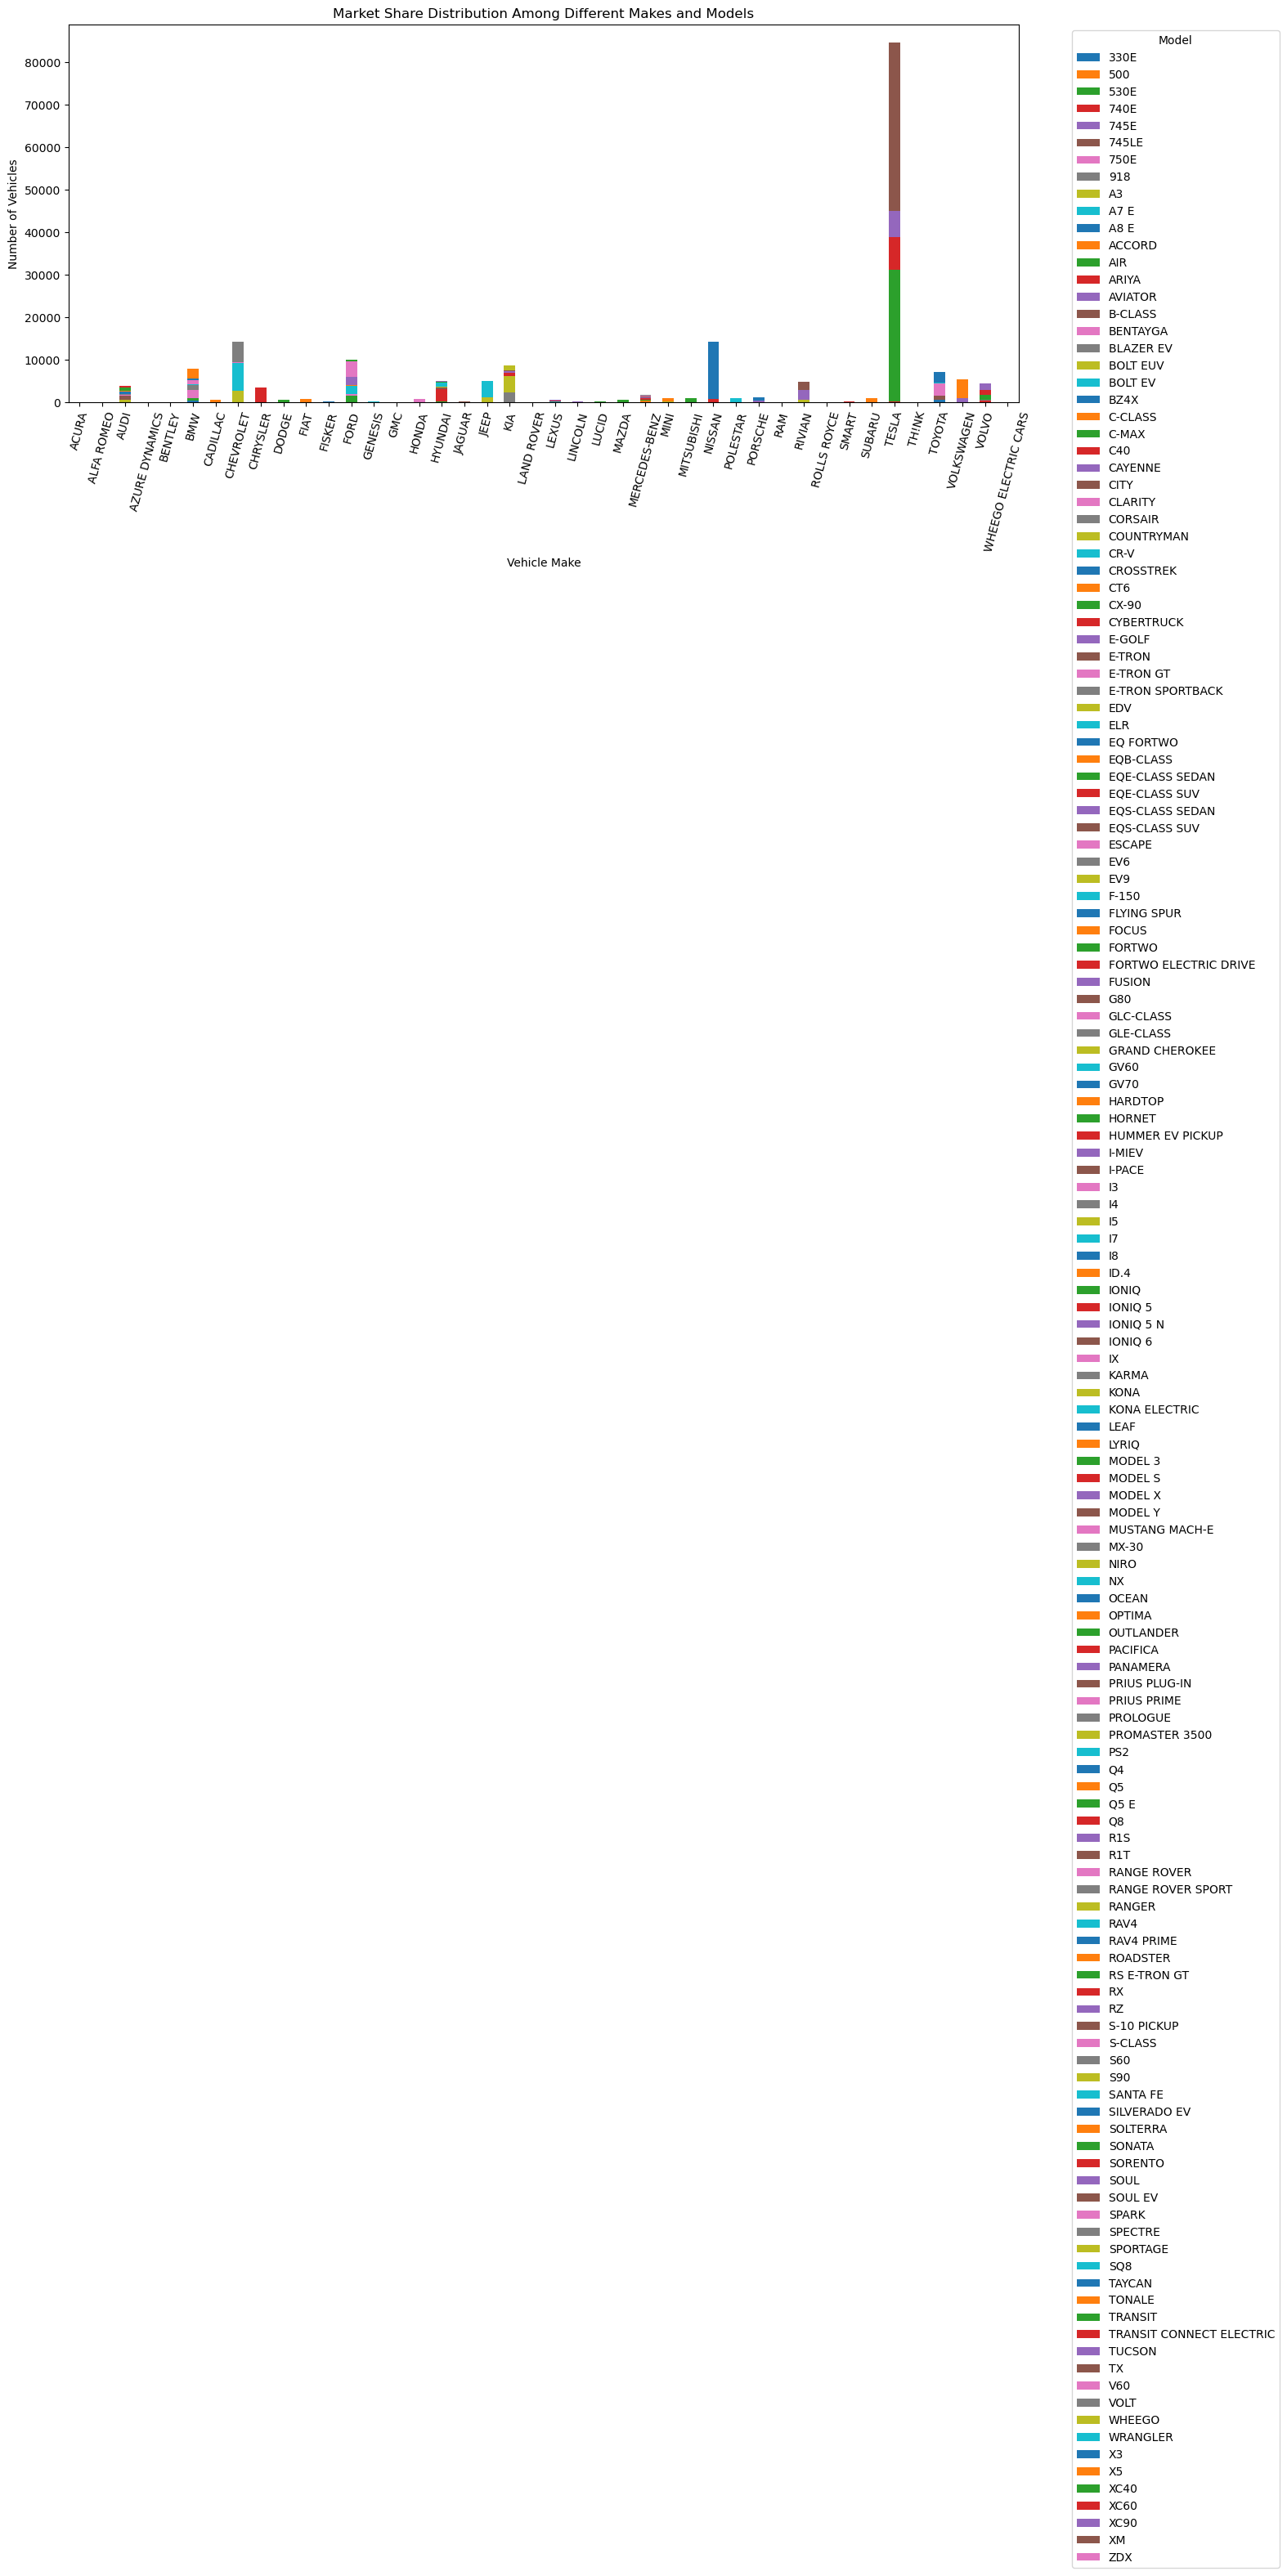

In [157]:
market_share = df.groupby(["Make", "Model"])["VIN (1-10)"].count().unstack()

market_share.plot(kind="bar", stacked=True, figsize=(15, 6))

plt.xlabel("Vehicle Make")
plt.ylabel("Number of Vehicles")
plt.title("Market Share Distribution Among Different Makes and Models")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1))
plt.show()


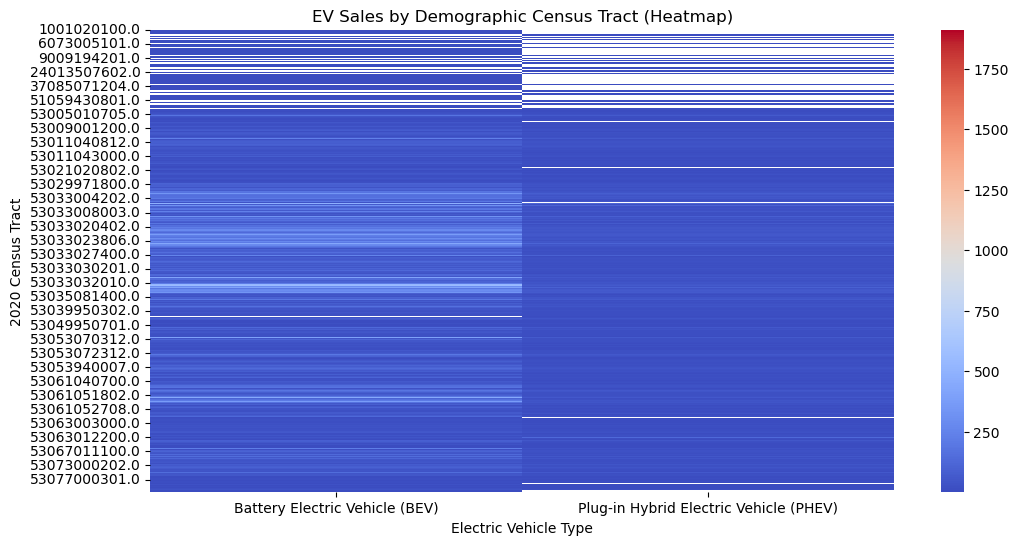

In [150]:
df_demograpg = df.groupby(["2020 Census Tract", "Electric Vehicle Type"])["VIN (1-10)"].count().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(df_demograph, cmap="coolwarm")

plt.xlabel("Electric Vehicle Type")
plt.ylabel("2020 Census Tract")
plt.title("EV Sales by Demographic Census Tract (Heatmap)")
plt.show()
